In [58]:
import os, sys, pandas as pd, numpy as np
import matplotlib.pyplot as plt
os.chdir('/Users/walu/mdwarfs/ae_classifier/')
sys.path.append('/Users/walu/mdwarfs/ae_classifier/network_architecture/ae_models')
sys.path.append('/Users/walu/mdwarfs/ae_classifier/network_architecture/classifier_models')
#from save_recon_plots import save_recon_plots
import data_processor as dp
from dwarf_trainer import DwarfTrainer


In [62]:
dpc = dp.DataProcessing('../training_data/SOLR_NonSOLR_unbalanced_v2.csv', input_dataset_shape=1024)


Shape of loaded data: (116165, 1026)
Label Mapping:
'NonSOLR' -> 0
'SOLR' -> 1
Input shape: 1024
Train set size: 81217
Validation set size: 34948
Number of classes: 2
Data processing completed.


In [65]:
"""
'lr' sets the learning rate for autoencoder and classifier
if separate learning rate for AE and classifier is needed, 
set lr for AE learning rate, and classifier_lr 
for classifier learning rate
"""

trainer = DwarfTrainer(
    data_processor= dpc,
    ae_model = 'nets_1024',
    classifier_model = 'binary_classifier',
    #model_id = 'test',
    model_id = 'SOLR_nonSOLR_bens_cubic_sequential',
    batch_size = 1024,
    num_epochs = 3000,
    lr = 1e-3,
    classifier_lr = 1e-4,
    scheduler_type = None,
    leaky_relu_a= 0.1,
    min_delta = 1e-6,
    patience = 1000,
    training_mode = 'sequential',
    ae_epochs = 1500,
    class_weighted_loss= True,
    save_val_recons= True
)

selected encoder: encode(
  (unflatten): Unflatten(dim=1, unflattened_size=(1, 32))
  (en_layer1): Sequential(
    (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer2): Sequential(
    (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer3): Sequential(
    (0): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer4): Sequential(
    (0): Conv1d(1, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (en_layer5): S

In [69]:
trainer.set_classifier_lr(.5e-4)
trainer.set_attr_(ae_epochs = 0)
trainer.train_and_validate()

Sequential training mode: first training autoencoder for 50 epochs.
Epoch [1/3000], Train Recon: 201.0219
Epoch [2/3000], Train Recon: 201.6732
Epoch [3/3000], Train Recon: 201.5639
Epoch [4/3000], Train Recon: 201.2665
Epoch [5/3000], Train Recon: 201.5544
Epoch [6/3000], Train Recon: 201.1218
Epoch [7/3000], Train Recon: 201.0350
Epoch [8/3000], Train Recon: 200.4550
Epoch [9/3000], Train Recon: 200.4097
Epoch [10/3000], Train Recon: 200.7585
Epoch [11/3000], Train Recon: 200.9536
Epoch [12/3000], Train Recon: 201.1575
Epoch [13/3000], Train Recon: 200.8852
Epoch [14/3000], Train Recon: 200.4097
Epoch [15/3000], Train Recon: 200.8523
Epoch [16/3000], Train Recon: 200.6759
Epoch [17/3000], Train Recon: 201.0079
Epoch [18/3000], Train Recon: 200.5294
Epoch [19/3000], Train Recon: 200.8110
Epoch [20/3000], Train Recon: 200.6049
Epoch [21/3000], Train Recon: 200.5664
Epoch [22/3000], Train Recon: 201.5162
Epoch [23/3000], Train Recon: 199.9708
Epoch [24/3000], Train Recon: 200.9687
Epoch

KeyboardInterrupt: 

In [16]:
import torch
torch.save(trainer.model.state_dict(), f'model_beta_testing_binary_unbalanced/best_model.pth')

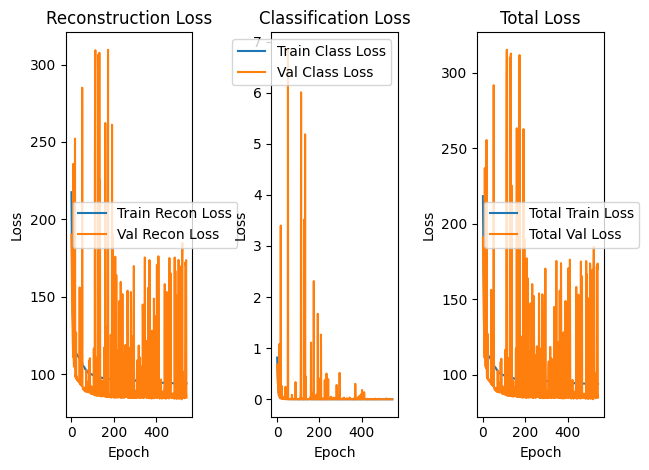

In [11]:
trainer.plot_losses()

Plotting recalls for 545 epochs.


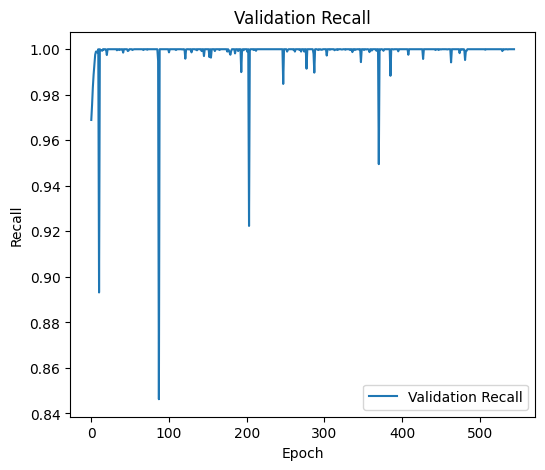

In [12]:
trainer.plot_recall()

Plotting accuracies for 545 epochs.


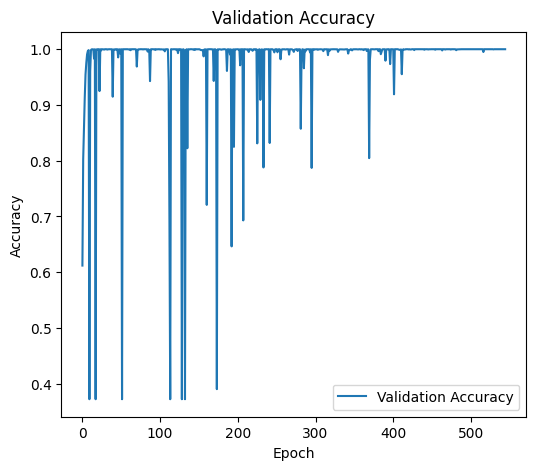

In [13]:
trainer.plot_accuracy()
#trainer.write_input_description()

<Figure size 800x600 with 0 Axes>

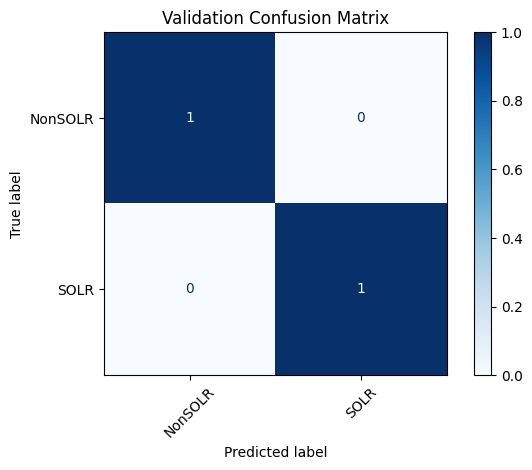

In [14]:
trainer.plot_confusion_matrix()

In [34]:
trainer.utils._validate()

{'val_recon_loss': 3.2338693737983704,
 'val_class_loss': tensor(0.3769),
 'val_accuracy': 0.8717755730413959,
 'val_precision': 0.7268292682926829,
 'val_recall': 0.9026095060577819,
 'val_f1': 0.8052379962585741}

In [33]:
trainer.load_best_model('model_beta_testing_binary_unbalanced_joint/best_model.pth')

Loaded model from model_beta_testing_binary_unbalanced_joint/best_model.pth


In [45]:
trainer.utils._validate()

{'val_recon_loss': 3.672552381096215,
 'val_class_loss': tensor(0.2989),
 'val_accuracy': 0.8624794745484401}

In [60]:
trainer.write_input_description()

TypeError: 'bens_cubic_code' object is not subscriptable